# 群举法

## 算法思想

### 先以两只股票作为股票组合
### 绘制有效前沿
### 将该股票组合看成一个整体，与新股票形成新股票组合，并回到第2步

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

stocks_monthly_price = pd.read_excel('月度数据.xlsx')

stocks_monthly_price.index=pd.DatetimeIndex(stocks_monthly_price.日期) # 日期索引变换

stocks_monthly_price.drop(labels=['日期'],axis=1,inplace=True)


# 绘制两个股票组合的有效前沿

## 获得月度收益率

In [24]:
luzhou = stocks_monthly_price['泸州老窖000568.SZ']
meidi = stocks_monthly_price['美的集团000333.SZ']

luzhou_monthly_return = np.log(luzhou)-np.log(luzhou.shift(1)) 
#luzhou_monthly_return.head()

meidi_monthly_return = np.log(meidi)-np.log(meidi.shift(1))
#meidi_monthly_return.head()
print(meidi_monthly_return.values)


[        nan -0.02877173  0.04455625  0.05331573 -0.03573211 -0.03234673
  0.08259829 -0.02185803  0.0702192  -0.05559359 -0.03791554 -0.09132248
  0.10443067  0.09353403  0.0396292   0.1823497  -0.01700787  0.02878417
  0.07007595  0.10914247  0.12526441 -0.02166765 -0.03431988 -0.12393886
 -0.02537134  0.0102992  -0.10679328 -0.11668024  0.03845737  0.05310983
 -0.01199696 -0.01450044  0.08522706 -0.0082988  -0.09269066 -0.15745349
  0.0015777  -0.00333363]


## 取2019-5-31到2020-06-30的月度收益率数据 并计算期望收益率、方差、相关系数

In [25]:
luzhou_return = luzhou_monthly_return[1:15]
meidi_return = meidi_monthly_return[1:15]
print(meidi_return)

日期
2019-05-31   -0.028772
2019-06-28    0.044556
2019-07-31    0.053316
2019-08-30   -0.035732
2019-09-30   -0.032347
2019-10-31    0.082598
2019-11-29   -0.021858
2019-12-31    0.070219
2020-01-23   -0.055594
2020-02-28   -0.037916
2020-03-31   -0.091322
2020-04-30    0.104431
2020-05-29    0.093534
2020-06-30    0.039629
Name: 美的集团000333.SZ, dtype: float64


In [31]:
luzhou_expect_return = luzhou_return.mean()
meidi_expect_return = meidi_return.mean()
luzhou_var = luzhou_return.var()
meidi_var = meidi_return.var() 
#print(luzhou_var)
corr = pd.Series(luzhou).corr(pd.Series(meidi),method = 'pearson')
print(meidi_expect_return)
print(meidi_var)
print(luzhou_expect_return)
print(luzhou_var)

0.013195939434215249
0.003989595745640849
0.012504907343048226
0.009104011377208919


## 根据公式计算投资组合的期望收益并绘制有效前沿

[-1.5  -1.45 -1.4  -1.35 -1.3  -1.25 -1.2  -1.15 -1.1  -1.05 -1.   -0.95
 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45 -0.4  -0.35
 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05  0.1   0.15  0.2   0.25
  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65  0.7   0.75  0.8   0.85
  0.9   0.95  1.  ]


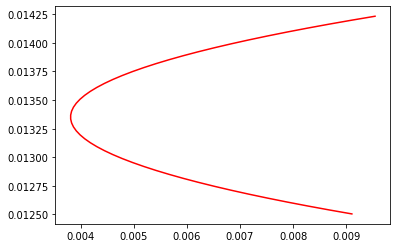

In [39]:
w = np.linspace(-1.5,1,51)
print(w)
portfolio_return = []
portfolio_var = []
for i in w:
    portfolio_return.append(i*luzhou_expect_return+(1-i)*meidi_expect_return)
    portfolio_var.append(luzhou_var*(i**2)+((1-i)**2)*meidi_var+2*(1-i)*i*corr*(math.sqrt(luzhou_var*meidi_var)))
plt.plot(portfolio_var,portfolio_return,'r')



# 加入第三只股票

0.015113221226317131
0.042531528312806675
[[], [], [], [], [], []]


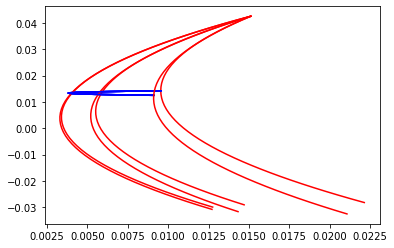

In [40]:
ningde = stocks_monthly_price['隆基绿能601012.SH']
ningde_monthly_return = np.log(ningde)-np.log(ningde.shift(1))
ningde_return = ningde_monthly_return[1:15]
ningde_expect_return = ningde_return.mean()
ningde_var = ningde_return.var()
print(ningde_var)
print(ningde_expect_return)

t = 6 #迭代次数
w2 = np.linspace(-1.5,1,6)
portfolio_price = []
new_portfolio_return = [[]for n in range(6)]
new_portfolio_var = [[]for n in range(6)]
print(new_portfolio_return)
for j in range(6):
    portfolio_price.append(np.sum([w2[j]*luzhou+(1-w2[j])*meidi],axis=0).tolist)
    corr1 = pd.Series(ningde).corr(pd.Series(portfolio_price),method = 'pearson')
    for i in w:
        new_portfolio_return[j].append(i*ningde_expect_return+(1-i)*portfolio_return[j*10])
        new_portfolio_var[j].append(ningde_var*(i**2)+((1-i)**2)*portfolio_var[j*10]+2*(1-i)*i*corr*(math.sqrt(ningde_var*portfolio_var[j*10])))
    plt.plot(portfolio_var,portfolio_return,'b',new_portfolio_var[j],new_portfolio_return[j],'r')




# 加入第四只股票

In [29]:
pingan = stocks_monthly_price['隆基绿能601012.SH']
pingan_monthly_return = np.log(pingan)-np.log(pingan.shift(1))
pingan_return = luzhou_monthly_return[1:15]
pingan_expect_return = pingan_return.mean()
pingan_var = pingan_return.var()
print(pingan_var)
print(pingan_expect_return)


0.009104011377208919
0.012504907343048226
